# 데이터 샘플링

- 모집단에서 일부의 표본을 추출하여 활용하는 것이 효율적이다.
- 훈련용/검증용으로 나눌 때도 샘플링 활용

## 표본추출 방법

### 통계
- 통계란, 특정 집단을 대상으로 수행한 조사나 실험을 통해 나온 결과에 대한 요약된 형태의 표현
- 조사 또는 실험을 통해 데이터 확보, 조사대상에 따라 총조사(census)와 표본 조사 로 구분

### 통계자료의 획득 방법
- 총조사/전수조사
- 표본 조사

### 표본 추출 방법
- 모집단을 대표 할 수 있는 표본의 추출이 중요
- 단순 임의 추출 법 : 각 개체에 번호를 부여, 랜덤하게 n개를 추출
- 계통추출법 : 랜덤하게 정렬된 표본에서 시간 또는 공간적으로 일정한 간격을 두고 표본을 추출
- 집락추출법 : 군집을 구분하고 군집을 먼저 선택한 후 해당 군집에서만 표본을 추출
- 층회추출법 : 모딥단이 이질적인 몇 개의 계층으로 이루어져 있을 때, 계층으로 부터 원소를 임의로 추출하여, 각 계층을 고루 대표할 수 있도록 랜덤하게 추출
- 다단계추출 : 표본 추출 과정을 여러 단계로 나눠, 표본으로 추출된 집단 내에서 다시 일부를 뽑고, 그 집단에서 다시 일부를 뽑는 방식

## R을 이용한 표본 추출

### 단순 임의 추출
- R에서 sample 함수 이용해 추출할 행 번호를 뽑은 뒤 데이터에 대해 단순 임의 추출 수행

#### 함수 사용법

```R
    sample(x, size, replace=FALSE, prop=NULL)
```

    - x : 표본을 추출하는 벡터
    - size : 표본의 크기
    - replace : 복원 추출 여부
    - prob : 데이터를 뽑을 때 가중치
    
#### 함수 사용 예제
- iris 데이터로 분석을 진행하기 위해, 전체 데이터를 7:3 비율로 training/test data 로 추출 하라
- 이를 새로운 변수에 저장하라 (데이터 추출은 단순임의추출을 사용하라)

In [2]:
# iris 데이터 행의 개수에서 70%에 해당하는 행번호로 랜덤 추출

idx  <- sample(1:nrow(iris), nrow(iris)*0.7, replace=FALSE)

In [4]:
# 추출한 행번호를 이용하여 training/test data 생성

training  <- iris[idx,]
test  <- iris[-idx,]

In [7]:
# 데이터 개수 확인

dim(iris)
dim(training)
dim(test)

[1] 150   5

[1] 105   5

[1] 45  5

### 층화 임의 추출
- 특정 데이터가 여성 계층 70%, 남성 계층 30%로 구성되어 있다고 가정
- 각 계측을 고루 대표할 수 있도록 표본을 추출하기 위해서는 여성과 남성 집단에 대해 7:3 비율로 데이터를 추출 해야 한다.

#### 함수 사용법

```R
    strata(data, stratanames=NULL, size, method=c("srswor", "srswr","poisson","systematic"), pik, description=FALSE)
```

    - data : 표본을 추출할 데이터프레임 또는 행렬
    - stratanames : 데이터에서 계층(집단)을 구분하는 변수들
    - size : 각 계층에서 추출할 데이터의 수
    - method : 데이터를 뽑는 방법
        - srswor : 비복원 단순 임의 추출
        - srswr : 복원 단순 임의 추출
        - poisson : 포아송 추출
        - systemattic : 계통 추출
    - pik : 데이터를 표본에 포함시킬 확률
    - description : 표본크기와 모집단 크기를 추출할지의 여부
    
- strata 함수를 통해 층화 임의 추출을 수행하여 얻어진 데이터는 getdata 함수를 통해 확인 가능

```R
    getdata(data, m)
```

    - data : 표본을 추출할 원본 데이터
    - m : 추출된 벡터 혹은 데이터 프레임
    
#### 함수 사용 예제
- iris 데이터에서 Species가 setosa인 데이터를 20개, versicolor인 데이터를 15개, versinica인 데이터를 15개 씩 층화 임의 추출 하라

In [8]:
# sampling 페키지 설치 및 로드
install.packages("sampling")
library(sampling)

‘/home/restful3/R/x86_64-pc-linux-gnu-library/4.2’의 위치에 패키지(들)을 설치합니다.
(왜냐하면 ‘lib’가 지정되지 않았기 때문입니다)

‘lpSolve’(들)을 또한 설치합니다.




In [16]:
# 층화 임의 추출한 뒤 sample 변수에 저장
sample <- strata(data=iris, c("Species"), size=c(20, 15, 15), method="srswor")

# sample 의 상위 6개
head(sample)

,Species,ID_unit,Prob,Stratum
,<fct>,<int>,<dbl>,<int>
1,setosa,1,0.4,1
2,setosa,2,0.4,1
4,setosa,4,0.4,1
8,setosa,8,0.4,1
9,setosa,9,0.4,1
10,setosa,10,0.4,1


In [17]:
# 추출된 데이터를 iris_sample 변수에 저장
iris_sample <- getdata(iris, sample)

In [19]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [18]:
# iris_sample의 상위 6개
head(iris_sample)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,ID_unit,Prob,Stratum
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<dbl>,<int>
1,5.1,3.5,1.4,0.2,setosa,1,0.4,1
2,4.9,3.0,1.4,0.2,setosa,2,0.4,1
4,4.6,3.1,1.5,0.2,setosa,4,0.4,1
8,5.0,3.4,1.5,0.2,setosa,8,0.4,1
9,4.4,2.9,1.4,0.2,setosa,9,0.4,1
10,4.9,3.1,1.5,0.1,setosa,10,0.4,1


In [20]:
# 표본 데이터의 Species 변수에 대한 도수 분포표
table(iris_sample$Species)


    setosa versicolor  virginica 
        20         15         15 

# T-검정(T-test)
- 두 집단의 평균을 통계적으로 비교하기 위해 사용
- 일표본, 대응표본, 독립표본 T-검정으로 나뉘어진다.

## 일표본 T-검정(One Sample T-Test)

### 일표본 T-검정 이란
- 단일모집단에서 관심이 있는 연속형 변수의 평균값을 특정 기준값과 비교
- e.g. A과수원에서 생산되는 사과의 평균 무게가 200g이라고 알려져 있을 때, 실제로 그러한가
- 단일모집단에서 알고자 하는 값이 종속변수가 되며
- 설정한 기준값과 종속변수의 평균값 사이의 차이가 통계적으로 유의미하다면 귀무가설 기각, 대립가설 채택, 두 값이 다르다고 결론

### 일표본 T-검정의 가정
- 모딥단의 구성요소들이 정규분포를 따른다
- 표본의 크기가 30보다 클 경우, 중심극한정리에 따라 표본이 정규분포를 따른다고 가정
- 종속변수는 연속형, 검증하고자 하는 기준값 필요

### 일표본 T-검정의 단계
#### 1단계 : 가설 설정
- 모수 : 모평균($\mu$)
- 귀무가설($H_0$) : $\mu$의 값은 $\mu_0$ (설정한 기준값) 이다 . ($\mu = \mu_0$)
- 대립가설($H_1$) : 
    - $\mu$의 값은 $\mu_0$ (설정한 기준값) 이 아니다 . ($\mu \neq \mu_0$) - 양측검증
    - $\mu$의 값은 $\mu_0$ (설정한 기준값) 보다 크다 . ($\mu > \mu_0$) - 우단측검증
    - $\mu$의 값은 $\mu_0$ (설정한 기준값) 보다 작다 . ($\mu < \mu_0$) - 좌단측검증    
    
#### 2단계 : 유의수준 설정

#### 3단계 : 검증통계량의 값 및 유의확률 계산
- 검정통계량의 값 : $t_0 = \frac{\bar{x}-\mu}{s/\sqrt(n)} \sim t(df)$, $df=n-1$
- $\bar{x}$ : 표본평균, $\mu_0$ : 모평균 추정치, $s$ : 표본 표준편차, $n$ : 표본의 개수, $df$ : 자유도

#### 4단계 : 귀무가설의 기각여부 판단 및 의사결정
- 유의 확률 (p-value) < 유의 수준 ($\alpha$) : 귀무가설 기각, 대립가설 채택
- 유의 확률 (p-value) > 유의 수준 ($\alpha$) : 귀무가설 기각하지 않는다

### 함수 사용법
- 일표본 T-검정을 수행하기 전 표본에 대한 정규성이 필요하면, 콜모고로프 스미르노프 검정, Q-Q plot 사용
- 이중, Shapiro-Wilk normality test 를 수행해 본다.
- Shapiro-Wilk normality test
    - 귀무가설 : 데이터가 정규분포를 따른다
    - 대립가설 : 데이터가 정규분포를 따르지 않는다.
``` R
    shapiro.test(data)
```
- 데이터가 정규 분포를 따른다는 가정을 만족하면, t.test 함수를 이용하여 일표본 T-검정을 수행
- 만약 정규성을 만족하지 않으면, wilcox.test 함수 이용
``` R
    t.test(x, alternative=c("two.sided", "less", "greater"), mu=0)
    wilcox.test(x, alternative=c("two.sided","less","greater"), mu=0)
```
- 인자 및 설명
    - x : 표본으로 부터 관측한 값 (수치형 벡터)
    - alternative : 양측검정 ("two.sided"), 단측 검정 ("less", "greater")
    - mu : 검증시 기준이 되는 값 ($\mu_0$)
    
### 함수 사용 예제
    - MASS 패키지의 cats 데이터
    - 성별 (sex), 몸무게(Bwt), 심장의 무게(Hwt)
    - 고양이들의 평균 몸무게가. 2.6kg 인지 아닌지 통계적 검증을 수행하고 결과를 해석해 보라
    - 양측검정, 유의수준 = 0.05

#### 가설
    - 귀무가설 : 고양이들의 평균 몸무게가 (Bwt) 2.6kg 이다.
    - 대립가설 : 고양이들의 평균 몸무게가 (Bwt) 2.6kg 이 아니다.    

In [2]:
# cats 데이터를 사용하기 위한 MASS 패키지 로딩
library(MASS)

# cats 데이터 구조 확인
str(cats)

'data.frame':	144 obs. of  3 variables:
 $ Sex: Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 1 1 1 ...
 $ Bwt: num  2 2 2 2.1 2.1 2.1 2.1 2.1 2.1 2.1 ...
 $ Hwt: num  7 7.4 9.5 7.2 7.3 7.6 8.1 8.2 8.3 8.5 ...


In [3]:
# Bwt 변수에 대한 정규성 검정
shapiro.test(cats$Bwt)


	Shapiro-Wilk normality test

data:  cats$Bwt
W = 0.95188, p-value = 6.731e-05


- 정규성 검정 결과 : p-value가 유의 수준 0.05 보다 작다, "데이터가 정규분포를 따른다"는 귀무가설 기각
- wilcox.test 로 T-검정

In [6]:
wilcox.test(cats$Bwt, mu=2.6, alternative="two.sided")


	Wilcoxon signed rank test with continuity correction

data:  cats$Bwt
V = 5607, p-value = 0.02532
alternative hypothesis: true location is not equal to 2.6


- wilcox 검정 결과 : p-value가 0.02532 로, 0.05보다 작다
- 귀무가설 "고양이들의 평균 몸무게가 (Bwt) 2.6kg 이다." 를 기각 한다
- 결론 : 고양이들의 평균 몸무게가 (Bwt) 2.6kg 이 아니다.

## 대응표본 T-검정(Paired Sample T-Test)
### 대응표본 T-검정 이란
- 단일 모집단에 대해 두 번의 처리를 가했을 때, 두개의 처리에 따른 평균의 차이를 비교
- e.g. 어느 기업에서 판매사원들의 역량 향상을 위해 두가지 방법으로 직업 교육 실시, 두 가지 교육법에 따른 판매실적 평균 차이 비교
- 하나의 모집단에서 크기가 n개인 하나의 표본을 추출한 후, 
- 표본 내의 개체들에 대해 두번의 측정 실시
- 관측값들은 서로 독립적이지 않고, 쌍으로 이루어져 있어, 대응표본 t-검정을 짝지어진 검정(matched pair t-test)라고 한다.
- 모집단과 표본은 하나씩이지만, 각 개체들에 대해 두 개씩 관측값이 존재, 모수는 두개
- 표본 내에 있는 각 개체별로 짝지어진 관측값 사이에 차이가 있는지 검정

### 대응표본 T-검정의 가정
- 모집단의 관측값이 정규성(정규분포 만족)을 만족한다
- 종속변수는 연속형 변수

### 단계
#### 1단계 : 가설 설정
- 모수 : 두 개의 모평균 사이의 차이(D)
- 귀무가설($H_0$) : 두 개의 모평균 간에는 차이가 없다,($\mu - \mu_0 = D = 0$)
- 대립가설($H_1$) : 
    - 두 개의 모평균 간에는 차이가 있다,($\mu - \mu_0 = D \neq 0$) - 양측검증
    - 두 개의 모평균 간에는 차이는 0보다 크다,($\mu - \mu_0 = D > 0$) - 우단측검증
    - 두 개의 모평균 간에는 차이는 0보다 작다,($\mu - \mu_0 = D < 0$) - 좌단측검증   
    
#### 2단계 : 유의수준 설정
#### 3단계 : 검정통계량의 값 및 유의확률 계산
- 검정통계량의 값 : $t = \frac{\bar{D} - (\mu_x - \mu_y)}{s_D\sqrt{n})} \sim t(df)$, $df = n-1$
- $\bar{D}$ 차이의 평균, $\mu_x$ : 처리 X의 평균 $\mu_y$ : 처리 Y의 평균, $s_D$: 차이의 표준편차, n : 표본의 수

#### 4단계 : 귀무가설의 기각여부 판단 및 의사 결정

### 함수 사용법
- R에서 대응표본 T-검정을 수행하기 위해서는 다음과 같이 t.test 함수를 사용한다.
``` R
    t.test(x, y, alternative = c("two.sided", "less","greater"), paired=FALSE, m=0)
```
- 인자 및 설명
    - x : 처리 방법이 x 일 때 관측값
    - y : 처리 방법이 y 일 때 관측값
    - alternative : 양측검정 ("two.sided"), 단측 검정 ("less", "greater")
    - paired : 대응표본 t-검정을 수행 할 경우 TRUE
    - m : 검정의 기본이 되는 값 (기본 값은 0, 적지 않아도 된다)
    
### 함수 사용 예제
- 10명의 환자를 대상으로 수면영양제를 복용하기 전후의 수면시간 비교
- 영양제 복용 전후의 수면시간 차이가 있는지 알아 보라
- 정규성 만족한다는 가정, 단측검정 수행, 유의수준 0.05

#### 가설
    - 귀무가설 : 수면영양제를 복용하기 전과 후의 수면시간에 차이가 없다 ($\mu_x - \mu_y = D = 0$)
    - 대립가설 : 
        - 수면영양제를 복용하기 전과 후의 수면시간에 차이는 0보다 작다.
        - 즉, 수면영양제를 복용한 후 평균수면시간이 늘어 났다.($\mu_x - \mu_y = D < 0$)

In [7]:
# 데이터 입력
data  <- data.frame(before=c(7,3,4,5,2,1,6,6,5,4),
                   after = c(8,4,5,6,2,3,6,8,6,5))
data

before,after
<dbl>,<dbl>
7,8
3,4
4,5
5,6
2,2
1,3
6,6
6,8
5,6


- 대응표본 T-검정

In [8]:
t.test(data$before, data$after, alternative="less", paired=TRUE)


	Paired t-test

data:  data$before and data$after
t = -4.7434, df = 9, p-value = 0.0005269
alternative hypothesis: true mean difference is less than 0
95 percent confidence interval:
       -Inf -0.6135459
sample estimates:
mean difference 
             -1 


- 검정 통계량(t) :-4.7434, 자유도(df) = 9, p-value = 0.0005269
- p-value가 0.05 보다 작아, 귀무가설 기각
- 따라서, 수면영양제를 복용한 후 평균수면시간이 늘어 났다

## 독립표본 T-검정(Independent Sample T-Test)
### 독립표본 T-검정 이란
- 두 개의 독립된 모집단의 평균을 비교
- e.g. 성별에 따른 출근준비 시간
- 두 개의 모집단에서 크기가 n개인 표본을 각각 추출
- 모집단, 모수, 표본이 모두 두개씩 존재

### 독립표본 T-검정의 가정
- 두 모집단은 정규성 만족
- 두 모집단은 서로 독립
- 두 모집단은 등분산성 가정 확인 (두 집단의 모분산이 동일)
- 독립변수는 범주형, 종속변수는 연속형

### 독립표본 T-검정의 단계
#### 1단계 : 가설 설정
- 모수 : 서로 독립된 두 모집단의 평균 ($\mu_1, \mu_2$)
- 귀무가설($H_0$) : 두 개의 모평균에는 차이가 없다 ($\mu_1 = \mu_2$)
- 대립가설($H_1$) 
    - 두 개의 모평균에는 차이가 있다. ($\mu_1 \neq \mu_2$) - 양측검정
    - 집단1의 모평균이 집단2의 모평균보다 크다. ($\mu_1 > \mu_2$) - 우단측검정
    - 집단1의 모평균이 집단2의 모평균보다 크다. ($\mu_1 < \mu_2$) - 좌단측검정
    
#### 2단계 : 유의수준 설정
#### 3단계 : 등분산 검정
- 두 모집단이 등분산성을 만족하는지 여부에 따라 유의확률과 검정통계량의 값이 다르게 계산
- 귀무가설($H_0$) : 두 집단의 분산이 동일하다 ($\sigma_1^2 = \sigma_2^2$)
- 대립가설($H_1$) : 두 집단의 분산이 다르다 ($\sigma_1^2 \neq \sigma_2^2$)

#### 3단계 : 검정통계량의 값 및 유의확률 계산
- $t = \frac{(\bar{X_1}-\bar{X_2}) - D_0}{s\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}} \sim t(df)$, $df= n_1 + n_2 -2$
#### 4단계 : 귀무가설의 기각여부 판단 및 의사결정
- $p-value < \alpha$ : 귀무가설 기각, 대립가설 채택
- $p-value > \alpha$ : 귀무가설을 기각하지 않는다.

### 함수 사용법
- 독립표본 t-검정을 수행하기에 앞서, 등분산성 검정을 수행 해야 한다.
- var.test의 사용법을 알아 본다.

``` R
    var.test(x, y, alternative)
    var.test(formula, data, alternative)
```

- 인자 및 설명
    - x : 모집단 1로 부터 측정한 관측값
    - y : 모집단 2로 부터 측정한 관측값    
    - formula : 수치형 벡터 ~ 집단분류
    - data : 등분산 검정을 수행할 데이터
    - alternative : 양측검정 ("two.sided"), 단측검정("less", "greater")
    
```R
    t.test(x, y, alternative, var.equal=FALSE)
    t.test(formula, data,alternative, var.equal=FALSE)
```

- 인자 및 설명
    - x : 모집단 1로 부터 측정한 관측값
    - y : 모집단 2로 부터 측정한 관측값    
    - formula : 수치형 벡터 ~ 집단분류
    - data : t-test를 수행할 데이터
    - alternative : 양측검정 ("two.sided"), 단측검정("less", "greater")
    - var.equal : 등분산성을 만족하는지의 여부
    
### 함수 사용 예제
- MASS 패키지의 cats 데이터
- 성별(sex), 몸무게(Bwt), 심장의 무게(Hwt)
- 고양이들의 성별에 따른 평균은 통계적으로 다른지 검증하고 결과를 해석해 보자
#### 가설
- 귀무가설 : 고양이의 성별에 따른 평균 몸무게는 통계적으로 유의미한 차이가 없다.
- 대립가설 : 고양이의 성별에 따른 평균 몸무게는 통계적으로 유의미한 차이가 있다.
#### 등분산성 검정 수행

In [1]:
# 데이터 불러오기
library(MASS)
data('cats')

In [2]:
# 등분산성 검정
var.test(Bwt~Sex, data=cats)


	F test to compare two variances

data:  Bwt by Sex
F = 0.3435, num df = 46, denom df = 96, p-value = 0.0001157
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2126277 0.5803475
sample estimates:
ratio of variances 
         0.3435015 


- p-p-value = 0.0001157, 0.05 보다 작음
- 귀무가설 기각, 등분산성을 만족한다고 할 수 없다.
#### t-검정 수행
- 등분산성을 만족하지 못함을 반영 해야 함

In [5]:
t.test(Bwt~Sex, data=cats, alternative="two.sided", var.equal=FALSE)


	Welch Two Sample t-test

data:  Bwt by Sex
t = -8.7095, df = 136.84, p-value = 8.831e-15
alternative hypothesis: true difference in means between group F and group M is not equal to 0
95 percent confidence interval:
 -0.6631268 -0.4177242
sample estimates:
mean in group F mean in group M 
       2.359574        2.900000 


- p-value = 8.831e-15, 유의 수준 5%에서 귀무가설 기각
- 고양이의 성별에 따른 평균 몸무게는 통계적으로 유의미한 차이가 존재 한다.

# 교차분석
- 명목척도 혹은 수서척도와 같은 범주형 자료들 간의 상호 연관성을 알아볼 때 사용
- 두 범주형 변수에 대한 관련성을 파악하고, 이를 통계적으로 검정
- 적합성/독립성/동질성 검정에 사용

## 교차분석 개념
### 교차분석의 개념 및 특징
- 범주형 자료 두 변수 간의 관계를 알아보기 위해 실시하는 분석 기법
- 적합성 검정, 독립성 검정, 동질성 검정에 사용
- 카이제곱($\chi^2$) 검정 통계량 이용
### 교차표
- 두 변수간의 각 범주를 교차하여 데이터의 관측도수(빈도)를 표 형태로 나타낸 것
- 교차분석은 교차표에서 각 셀의 관찰빈도와 기대빈도간의 차이를 검정

## 적합성 검정
### 적합성 검정이란
- 실험에서 얻어진 관측값들이 예상한 이론과 일치하는지 아닌지 검정하는 방법
- 관측값들이 어떠한 이론적 분포를 따르고 있는지 알아 본다
- 모집단 분포에 대한 가정이 옳게 됐는지를 관측자료와 비교하여 검정

### 가설 설정
- n개의 표본자료를 k개의 범주로 분류
- 각 범주의 관측도수와 주어진 확률분포에 대해 각 범주에 속하는 기대도수 들이 적합하는지 여부 검정
- 귀무가설 : 실제 분포와 이론적 분포 간에는 차이가 없다 (두 분포가 일치)
- 대립가설 : 실제 분포와 이론적 분포 간에는 차이가 있다 (두 분포가 일치하지 않는다)

### 검정 통계량
- $\chi^2 = \sum_{i=1}^k\frac{(O_i - E_i)^2}{E_i}$
- $\chi^2$이 큰 경우 : 관찰 도수와 기대도수 차이가 크다, 적합도가 낮다.
- $\chi^2$이 작은 경우 : 관찰 도수와 기대도수 차이가 적다, 적합도가 높다.

### 자유도
- $df = k-1 $
- k : 범주의 수 

### 함수 사용법
- R의 적합도 검정은 chisq.test 함수 사용
``` R
    chisq.test(x, y, p)
```
- 인자 및 설명
    - x : 검정 하고자 하는 데이터
    - y : 검정 하고자 하는 데이터
    - p : 귀무가설을 통해 설정한 확률
    
### 함수 사용 예제
- MASS 패키지, survey 데이터
- W.Hnd : 설문 응답자가 왼손자비 인지 오른손잡이 인지
- H.Hnd 변수로 분할표 생성
- 귀무가설 : 전체 응답자 둥 왼손잡이 비율이 20%, 오른손잡이 비율이 80% 이다
- 대립가설 : 전체 응답자 둥 왼손잡이 비율이 20%, 오른손잡이 비율이 80% 라고 할 수 없다.

In [7]:
# MASS 패키지 및 데이터 로드
data(survey, package="MASS")

In [8]:
# survey 데이터 구조 확인
str(survey)

'data.frame':	237 obs. of  12 variables:
 $ Sex   : Factor w/ 2 levels "Female","Male": 1 2 2 2 2 1 2 1 2 2 ...
 $ Wr.Hnd: num  18.5 19.5 18 18.8 20 18 17.7 17 20 18.5 ...
 $ NW.Hnd: num  18 20.5 13.3 18.9 20 17.7 17.7 17.3 19.5 18.5 ...
 $ W.Hnd : Factor w/ 2 levels "Left","Right": 2 1 2 2 2 2 2 2 2 2 ...
 $ Fold  : Factor w/ 3 levels "L on R","Neither",..: 3 3 1 3 2 1 1 3 3 3 ...
 $ Pulse : int  92 104 87 NA 35 64 83 74 72 90 ...
 $ Clap  : Factor w/ 3 levels "Left","Neither",..: 1 1 2 2 3 3 3 3 3 3 ...
 $ Exer  : Factor w/ 3 levels "Freq","None",..: 3 2 2 2 3 3 1 1 3 3 ...
 $ Smoke : Factor w/ 4 levels "Heavy","Never",..: 2 4 3 2 2 2 2 2 2 2 ...
 $ Height: num  173 178 NA 160 165 ...
 $ M.I   : Factor w/ 2 levels "Imperial","Metric": 2 1 NA 2 2 1 1 2 2 2 ...
 $ Age   : num  18.2 17.6 16.9 20.3 23.7 ...


In [9]:
# W.Hnd 분할표 확인
table(survey$W.Hnd)


 Left Right 
   18   218 

In [10]:
# W.Hnd변수의 분할표를 data 객체에 저장
data <- table(survey$W.Hnd)

In [11]:
# 적합도 검정
chisq.test(data, p=c(0.2, 0.8))


	Chi-squared test for given probabilities

data:  data
X-squared = 22.581, df = 1, p-value = 2.015e-06


- p-value = 2.015e-06, 0.05보다 작아, 유의수준 5%에서 귀무 가설 기각
- 따라서, 전체 응답자 둥 왼손잡이 비율이 20%, 오른손잡이 비율이 80% 라고 할 수 없다.

## 독립성 검정
### 독립성 검정이란
- 모집단이 두 개의 변수, A, B에 의해 범주화 되었을 때, 이 두 변수들 사이에 관계가 독립인지 검증
- 교차표 활용

### 가설 설정
- 두 변수 A, B가 서로 독립적으로 관측값에 영향을 미치는지 여부
- 귀무가설 : 두 변수 사이에는 연관성이 없다 (독립)
- 대립가설 : 두 변수 사이에는 연관성이 있다 (종속)

### 검정 통계량
- $\chi^2 = \sum_{i=1}^k\frac{(O_i - E_i)^2}{E_i}$
- $\chi^2$이 큰 경우 : 두 변수 사이에 연관이 있다, 종속
- $\chi^2$이 작은 경우 : 두 변수 사이에 연관이 없다, 독립

### 자유도
- $df = (R-1)(C-1)$
- R : 행의 수
- C : 열의 수

### 함수 사용법
- chisq.test 함수 사용
- 인자로 분할표 사용
- 분할표는 xtabs, table 함수로 생성
- xtabs 함수는 formula를 사용해 분할표 생성
``` R
    xtabs(formula, data)
```
- 인자 및 설명
        - formula : 분할표를 만들고자 하는 변수
        - data : 적용할 데이터

- table 함수 사용법
``` R
    table(범수형변수) #도수분포표 생성
    table(범주형변수1, 범주형변수2) # 두 변수간 이원분할표 생성
```

### 예제
- MASS 패키지, survey 데이터
- Exer 변수: 설문 응답자가 얼마나 자주 운동을 하는지 (Freq, Some, None)
- W.Hnd 변수 : 설문 응답자가 왼손잡이 인지 오른손 잡이인지 (Left, Right)
- 귀무가설 : W.Hnd과 Exer 는 독립이다
- 대립가설 : W.Hnd과 Exer 는 독립이 아니다

In [12]:
# 데이터 불러오기
data(survey, package="MASS")

In [14]:
# 분할표 생성
data <- table(survey$W.Hnd, survey$Exer)
data

       
        Freq None Some
  Left     7    3    8
  Right  107   21   90

In [17]:
# 카이제곱 검정
chisq.test(data)

Warning message in chisq.test(data):
“카이제곱 approximation은 정확하지 않을수도 있습니다”



	Pearson's Chi-squared test

data:  data
X-squared = 1.2065, df = 2, p-value = 0.547


- p-value = 0.547, 0.05 보다 크다, 따라서 귀무가설을 기각하지 못한다.
- W.Hnd과 Exer 는 독립이다라고 말 할 수 있다.

## 동질성 검정
### 동질성 검정 이란
- 모집단이 임의의 변수에 따라 R개의 속성으로 범주화 되어 있을 때
- R개의 부분 모집단에서 추출한 표본인 C개의 범주화된 집단의 분포가 서로 동일한지 검증
- 검정 통계량 값을 계산할 때는 교차표 활용
- 계산 방법은 앞서, 독립성 검정과 동일

### 가설 설정
- $j=1,2,...,c$
- 귀무가설($H_0$) : $P_{1j} = P_{2j} = ... = P_{rj}$ (모든 $ P_{nj}(n=1,2,...,r)$은 동일)
- 대립가설($H_1$) : Not $H_0$ 중 다른 값이 하나 이상 존재

### 검정 통계량
- $\chi^2 = \sum_{i=1}^k\frac{(O_i - E_i)^2}{E_i}$
- $\chi^2$이 큰 경우 : $P_{1j} = P_{2j} = ... = P_{rj}$ 중 다른 값이 하나 이상 존재.
- $\chi^2$이 작은 경우 : 모든 $P_{1j} = P_{2j} = ... = P_{rj}$ 는 동일

### 자유도
- $df = (R-1)(C-1)$
- R : 행의 수
- C : 열의 수

# 분산분석(ANOVA)
- t-검정은 두 집단 간의 평균 차이를 비교
- 분산분석은 두 개 이상의 다수 집단 간 평균을 비교하는 통계분석
- 분산분석은 독립변수의 개수에 따라 일원배치, 이원배치, 다원배치 분산분석으로 나뉜다.

## 일원배치 분산분석(One-way ANOVA)
### 분산분석의 개념
- 두개 이상의 집단에서 그룹 평균 간 차이를 그룹 내 변동에 비교하여 살펴보는 통계분석
- 두개 이상 집단들의 평균 간 차이에 대한 통계적 유의성을 검증 (두 개 이상의 집단들의 평균 비교)
### 일원배치 분산분석의 개념
- 분산분석에서 반응값에 대한 하나의 범주형 변수의 영향을 알아보기 위해 사용
- 모집단의 수에는 제한이 없으며, 각 표본의 수는 같지 않아도 된다.
- F검정 통계량 사용
### 일원배치 분산분석의 가정
- 각 집단의 측정치는 서로 독립적이며 정규분포를 따른다
- 각 집단 측정치의 분산은 같다(등분산 가정)
### 분산분석표
- 제곱합, 자유도, 평균제곱, 분산비 등으로 만든다
### 가설검정
- 귀무가설 : k개의 집단 간 모평균에는 차이가 없다.
- 대립가설 : k개의 집단 간 모평균이 모두 같다고 할 수 없다.
### 사후 검정
- 분산분석의 결과 귀무가설이 기각되어 적어도 한 집단에서 평균의 차이가 있음이 통계적으로 증명되었을 때, 어떤 집단들에 대해서 평균의 차이가 존재하는지를 알아보기 위해 실시하는 분석
- 종류로는, Duncan의 MRT(Multiple Range Test), Fisher의 LSD(최소유의차), Tukey의 HSD, Scheffe 등이 있다.
### R을 활용한 일원배치 분산분석
#### 함수 사용법
- R에서 분산분석을 수행하기 위해서는 aov 함수 사용.
```R
    aov(formula, data)
```
- 인자 및 설명
    - formula : 반응 변수 ~ 그룹 변수
    - data : 데이터
- 등분산 검정의 결과로 귀무가설이 기각되었을 경우, 어떠한 집단들 사이에서 통계적으로 유의한 차이가 있는지 알아보기 위해 수행하는 사후 분석
    - Tukey의 HSD 검정법을 수행할 수 있는 R의 TukeyHSD
```R
    TukeyHSD(x, conf, level=0.95, ...)
```
- 인자 및 설명
    - x : 분산분석의 결과
    - conf.level : 신뢰수준에 해당 (기본값은 0.95)
    
#### 함수 사용 예제
- R의 iris 데이터를 이용, Species 별 Sepal.Width의 평균이 같은지 다른지 확인
- 가설
    - 귀무가설 : 세가지 종에 대해 Sepal.Width의 평균은 모두 같다.
    - 대립가설 : 세가지 종에 대해 Sepal.Width의 평균값에는 차이가 있다.
- 분산분석    

In [2]:
result <- aov(Sepal.Width ~ Species, data=iris)
summary(result)

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  11.35   5.672   49.16 <2e-16 ***
Residuals   147  16.96   0.115                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

- SSA의 자유도는, 3-1 = 2, SSE의 자유도는 150-3 = 147
- p-value = 2e-16 < 0.05, 귀무가설 기각
- 따라서, 세가지 종에 대해 Sepal.Width의 평균값에는 차이가 있다, 적어도 하나의 종은 나머지 종들과 평균이 유의미한 차이가 있다.
- 세 가지 종들 중 어떠한 종들 간에 Sepal.Width에 차이가 있는지 사후 검정을 실시 한다.

In [5]:
TukeyHSD(result)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Sepal.Width ~ Species, data = iris)

$Species
                       diff         lwr        upr     p adj
versicolor-setosa    -0.658 -0.81885528 -0.4971447 0.0000000
virginica-setosa     -0.454 -0.61485528 -0.2931447 0.0000000
virginica-versicolor  0.204  0.04314472  0.3648553 0.0087802


- 사후분석의 가설
    - 귀무가설 : 집단들 사이의 평균은 같다.
    - 대립가설 : 집단들 사이의 평균은 같지 않다.
- 모든 집단 수준에 대해, 두 집단 씩 짝(versicolor-setosa, virginica-setosa, virginica-versicolor)을 지어 각각 다중비교 수행
- 모든 짝의 p-value가 0.05보다 작음, 따라서 귀무가설 기각
- 즉, 모든 종들에 대해 꽃받침 폭의 평균값은 통계적으로 유의미한 차이가 있다.
- 또한, diff는 - (하이픈) 왼쪽과 오른쪽 집단 간의 차이를 나타내는데, 
- versicolor과 setosa의 차이는 음수, 따라서 setosa가 versicolor 보다 더 Sepal.Width의 평균이 크다

## 이원배치 분산분석 (Two-way ANOVA)
### 개념
- 반응값에 대해 두 개의 범주형 변수 A,B의 영향을 알아보기 위해 사용되는 검증 방법
- e.g. 성별과 학년에 따른 시험전수의 차이
- 두 독립변수 A, B사이에 상관관계 (교호작용 - 두 독립변수의 범주들의 조합으로 인해 반응변수에 미치는 특별한 영향)에 관한 검증 필요.
### 가정
- 각 집단 측정치의 분포는 정규분포 (정규성)
- 집단 간 측정치의 분산은 같다 (등분산성)
### 주효과와 교호작용 효과
- 두 독립변수의 교호작용의 검증 필요
- 주효과란 각각의 독립변수가 종속변수에 미치는 효과를 의미
- 교호작용효과는 여러 독립변수들의 조합이 종속변수에 주는 영향을 의미
- 즉, 한 독립변수가 종속변수에 미치는 영향이 다른 독립변수의 수준에 따라서 달라지는지를 분석
- 두 독립변수 A, B간에 상관관계가 존재 한다면 교호작용이 있다는 의미.
### 분산분석표
### 가설검정
- 귀무가설
    - $\alpha$ 변수에 따른 종속변수의 값에는 차이가 없다.
    - $\beta$ 변수에 따른 종속변수의 값에는 차이가 없다.    
    - $\alpha$와 $\beta$ 변수의 상호작용이 없다.
- 대립가설
    - $\alpha$ 변수에 따른 종속변수의 값에는 차이가 있다.
    - $\beta$ 변수에 따른 종속변수의 값에는 차이가 있다.    
    - $\alpha$와 $\beta$ 변수의 상호작용 효과가 있다.
### R을 활용한 이원배치 분산분석
#### 함수 사용법
- aov 함수 : 이원배치 분산분석
```R
    aov(formula, data)
```
- 인자 및 인자값
    - formula : 반응변수 ~ 그룹변수
    - data : 분석하고자 하는데이터명
- interaction.plot 함수 : 상호작용 시각화    
```R
    interaction.plot(x.factor, trace.factor, response)
```
- 인자 및 인자값
    - x.factor : x축에 그릴 그룹변수
    - trace.factor : 그래프로 표현할 그룹변수
    - response : 반응변수값을 저장할 벡터
#### 함수 사용 예제
- R 에 내장된 mtcars 데이터, cyl변수(실리더)와 am변수(변속기)에 따른 mpg변수(주행거리) 평균에 유의미한 차이가 존재 하는가
- 귀무가설
    - 실린더 개수에 따른 주행거리의 차이는 존재하지 않는다.
    - 변속기 종류에 따른 주행거리의 차이는 존재하지 않는다.    
    - 변속기 종류와 실린더 개수 사이에는 상호작용 효과가 없다.
- 대립가설
    - 실린더 개수에 따른 주행거리의 차이는 존재한다.
    - 변속기 종류에 따른 주행거리의 차이는 존재한다.
    - 변속기 종류와 실린더 개수 사이에는 상호작용 효과가 있다.
#### 데이터 확인 및 전처리    

In [6]:
data("mtcars")
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [7]:
# aov 함수 사용을 위해 독립변수인 cyl, am 을 팩터형으로 변환
mtcars$cyl <- as.factor(mtcars$cyl)
mtcars$am <- as.factor(mtcars$am)

In [8]:
# cyl, am, mpg 변수들로 구성된 분석용 테이블 생성
car <- mtcars[, c('cyl', 'am', 'mpg')]
str(car)

'data.frame':	32 obs. of  3 variables:
 $ cyl: Factor w/ 3 levels "4","6","8": 2 2 1 2 3 2 3 1 1 2 ...
 $ am : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 1 1 1 1 ...
 $ mpg: num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...


#### 분산분석 수행

In [9]:
car_aov <- aov(mpg~cyl*am, car)
summary(car_aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
cyl          2  824.8   412.4  44.852 3.73e-09 ***
am           1   36.8    36.8   3.999   0.0561 .  
cyl:am       2   25.4    12.7   1.383   0.2686    
Residuals   26  239.1     9.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

- cyl 변수에 대한 p-value = 3.73e-09 < 0.05, 귀무가설 기각,  따라서,'실린더 개수는 주행거리의 평균간 차이에 유의미한 차이가 존재한다.
- am 변수에 대한 p-value = 0.0561 > 0.05, 귀무가설 기각 하지 못함, 따라서, '변속기 종류에 따른 주행거리 평균간 차이는 존재하지 않는다'
- cyl변수와 am변수간 상호작용 효과는, p-value = 0.2686 > 0.05, 귀무가설 기각 하지 못함, 따라서, '변속기 종류와 실린더 개수 사이에는 상호작용 효과가 없다.'

#### cyl변수와 am 변수 사이의 상호작용 시각화

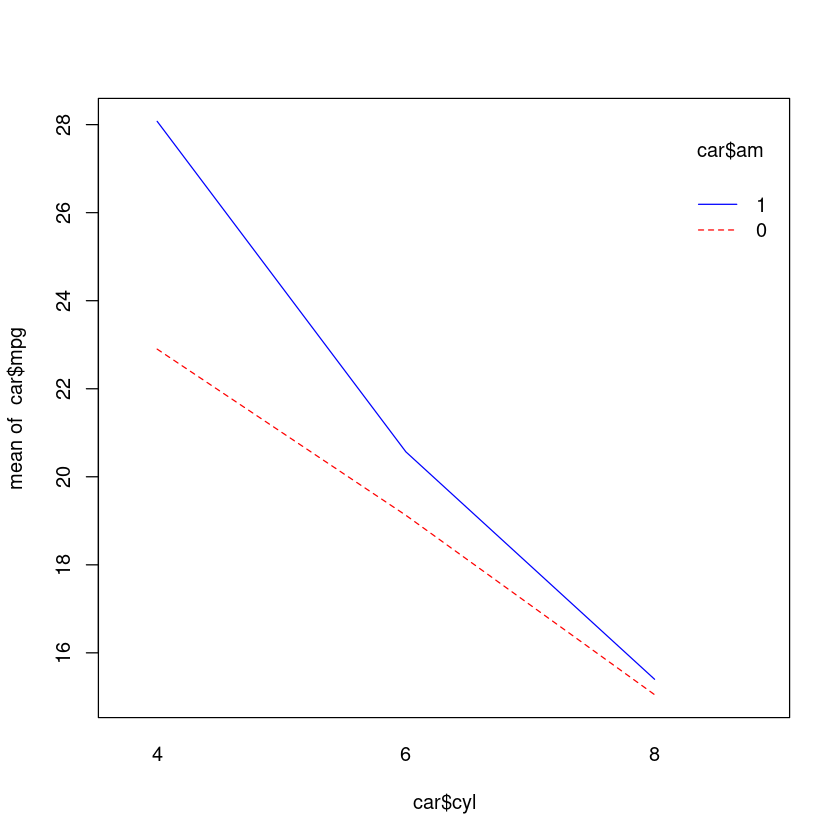

In [11]:
interaction.plot(car$cyl, car$am, car$mpg, col=c('red','blue'))

- 두 선이 교차하고 있을 때 x축에 있는 변수와 y축의 변수가 상호작용을 한다고 해석 할 수 있다.
- 위 그래프는 교차하고 있지 않음을 볼때, 교호작용이 없다고 할 수 있다.

# 상관분석
- 변수들 간의 상관 관계, 방향, 크기를 분석 하는것

## 개념
### 상관분석
- 두 변수간 관계 정도를 알아내기 위한 분석 방법
- 상관계수는 데이터간 상관관계가 얼마나 강한지 수치화 한것
    - $r = \frac{cov(x, y)}{S_x \times S_y}$
- 상관계수 값이 클수록 데이터 간의 관계가 존재 한다는 의미, 그러나 인과 관계는 아님에 주의
- 피어슨, 스피터만 상관계수, 켄달의 순위 상관계수 등이 있음
### 공분산과 상관계수
- 공분산은, 두 확률변수가 함께 변화한는지의 정도
- 두 변수간의 단위에 따라 크기가 $-\infty$에서 $\infty$ 사이에 존재, 상관성의 정도를 파악하는데 한계가 있음
- 따라서, 공분산을 두 변수의 표준편차의 곱으로 나누어 표준화 시킨 상관계수를 이용
### 상관계수의 해석
- -1과 1 사이의 값
- 1에 가까울 수록 양의 상관성, 0에 가까울 수록 상관성이 없다
- 마이너스는 음의 상관성을 의미
- 두 변수가 독립이면 0
## 상관분석의 유형
### 피어슨 상관계수
- 두 연속형 자료가 모두 정규성을 따를 경우 사용
- 가장 많이 사용, 일반적으로 상관계수라고 하면 피어슨 상관계수 임
### 스피어만 상관계수
- 두 변수가 정규성을 만족하지 않은 경우
- 순위 및 순서의 형태인 경우
- 데이터의 순위를 매긴 후 그 순위에 대한 상관계수를 산출 하는 비모수적 방법
- -1 부터 1 사이의 값
- 비선형 관계의 연관성을 파악 가능
- 연속형 외에도, 이산형, 순서형 자료에도 적용 가능
### 캔달의 순위상관계수
- 데이터가 (X,Y)와 같은 순서쌍으로 주어져 있을 때, 
- X가 커짐에 따라 Y도 커질 경우를 부합
- X가 커짐에 따라 Y가 작아지는 경우를 비부합
- 전체 데이터에서 부합쌍에 대한 비부합쌍의 비율로 상관계수 산출
- -1에서 1사이의 값
- 1은 전체 쌍에서 100%가 부합, -1은 100%가 비부합 의미
- 0인 경우는 두 변수간의 상관성이 없음 의미
## 상관계수 검정
### 상관계수에 대한 검정
- 상관분석은 분석 간 상관계수에 대한 추정이나 검정을 하는 것
- 가설
    - 귀무가설 : 변수1과 변수2간에는 상관관계가 없다. (상관계수 = 0)
    - 대립가설 : 변수1과 변수2간에는 상관관계가 있다. (상관계수 = 1)    
- p-value가 0.05 이하인 경우, 귀무가설 기각, 상관계수 활용 가능
### R을 이용한 상관분석
#### 함수 사용법
- cor 함수 사용
```R
    cor(x,y, method=c("pearson","kendall","spearman"), use)
```
- 인자 및 인자값
    - x : 연속형 자료(벡터, 행렬, 데이터프레임)
    - y : 연속형 자료(벡터, 행렬, 데이터프레임, NULL)
    - method : 상관계수를 계산할 유형 지정, "pearson","kendall","spearman"
    - use : na 값 처리 방법 (everything, all.obs, coimplete.obs, pairwise.complete.obs'
- 산출된 상관계수에 대한 가설 검정 수행에는 cor.test 사용
```R
    cor.test(x,y, alternative=c("two.sided","less","greater"),method=c("pearson","kendall","spearman"))
```
- 인자 및 인자값
    - x, y : 숫자 벡터
    - alternative : 대립가설의 형태 지정
    - method : 상관계수를 계산할 유형 지정, "pearson","kendall","spearman"
- 시각화 하기 위한 pairs 함수 및 corrplot 패키지의 corplot 함수 
```R
    pairs(x, labels,...)
```
- 인자 및 인자값
    - x : 시각화 할 행렬
    - labels : 그래프 제목
```R
    corrplot(corr, method, ...)
```   
- 인자 및 인자값
    - corr : 시각화 할 상관행렬
    - method : 표현할 형태
#### 함수 사용 예제
##### 문제1
- airquality 데이터는 뉴욕의 일일 대기 오염 정도
- 6개의 변수, Month, Day 제외
- Ozone, Solar.R, Wind, Temp를 air 변수에 할당
- 위 네 변수에 대한 상관계수 산출
- 단, NA가 없는 변수들만 사용, 피어슨, 캔달, 스피어만 상관계수를 모두 산출

In [15]:
# 데이터 로드
data("airquality")
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


In [17]:
# air 데이터 생성
air <- airquality[, c(1:4)]
str(air)

'data.frame':	153 obs. of  4 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...


In [19]:
# 피어슨 상관계수 
cor(air, use="pairwise.complete.obs", method="pearson")

,Ozone,Solar.R,Wind,Temp
Ozone,1.0000000,0.34834169,-0.60154653,0.6983603
Solar.R,0.3483417,1.00000000,-0.05679167,0.2758403
Wind,-0.6015465,-0.05679167,1.00000000,-0.4579879
Temp,0.6983603,0.27584027,-0.45798788,1.0000000


In [20]:
# 캔달 상관계수 
cor(air, use="pairwise.complete.obs", method="kendall")

,Ozone,Solar.R,Wind,Temp
Ozone,1.0000000,0.2403194214,-0.4283602915,0.5862988
Solar.R,0.2403194,1.0000000000,0.0006785596,0.1442337
Wind,-0.4283603,0.0006785596,1.0000000000,-0.3222418
Temp,0.5862988,0.1442336719,-0.3222417514,1.0000000


In [21]:
# 스피어만 상관계수 
cor(air, use="pairwise.complete.obs", method="spearman")

,Ozone,Solar.R,Wind,Temp
Ozone,1.0000000,0.3481864700,-0.5901551241,0.7740430
Solar.R,0.3481865,1.0000000000,-0.0009773325,0.2074275
Wind,-0.5901551,-0.0009773325,1.0000000000,-0.4465408
Temp,0.7740430,0.2074275160,-0.4465407773,1.0000000


- Ozone과 Temp 간의 상관관계 계수가 가장 크다 (양의 상관관계)
- Solar.R과 Wind 변수간의 상관계수의 절대값이 0에 가까워 상관성을 거의 가지고 있지 않음

##### 문제2
- air 데이터의 네 변수간의 조합별 피어슨 상관계수의 시각화

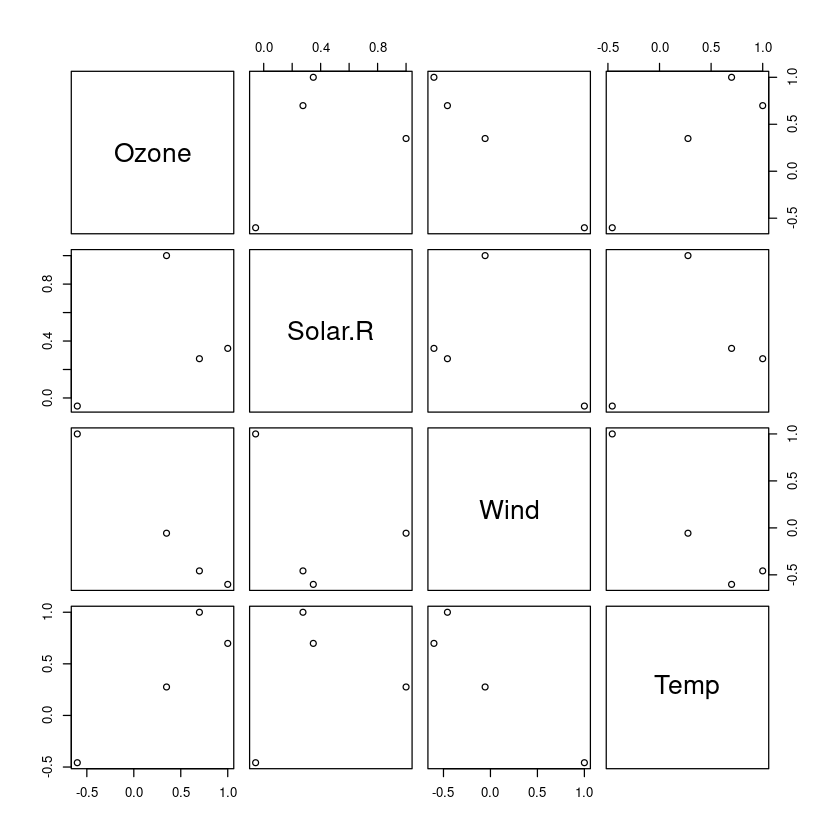

In [23]:
air_cor <- cor(air, use="pairwise.complete.obs")
pairs(air_cor)

##### 문제3
- air 데이터의 Ozone과 Wind간의 상관분석 및 피어스 상관계수에 대한 검정 결과

In [24]:
cor.test(air$Ozone, air$Wind, method="pearson")


	Pearson's product-moment correlation

data:  air$Ozone and air$Wind
t = -8.0401, df = 114, p-value = 9.272e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7063918 -0.4708713
sample estimates:
       cor 
-0.6015465 


- p-value = 9.272e-13 < 0.05, 유의 수준 0.05에서 귀무가설 기각
- 즉, Ozone과 Wind간의 상관계수는 0이 아니며, -0.6015465 은 상관계수로 사용 가능
- 상관계수가 음수, 한쪽이 증가하면 다른 한쪽은 감소, 절대값은 0.6은 약한 상관관계를 의미

# 회귀분석
- 어떤 요소들이 매출 증대에 얼마나 영향을 주는가 와 같이, 특정 요소가 결과에 미치는 영향을 식으로 만들고, 유의성을 분석하는것
- 하나의 요소가 결과에 미치는 영향을 모형화 하는 것은 단순회귀 분석
- 여러의 요소가 결과에 미치는 영향을 모형화 하는 것은 다중회귀 분석

## 개념
### 회귀분석
- 하나 혹은 그 이상의 원인(독립변수)이 결과(종속변수)에 미치는 영향을 추정하여 식으로 표현할 수 있는 통계 기법
- 변수들 사이의 인과관계를 밝히고 모형을 적합하여 관심있는 변수를 예측하거나 추론하기 위해 사용하는 분석방법
- 독립변수의 개수가 하나이면 단순선형회귀, 두개 이상이면 다중선형회귀
### 선형회귀의 가정
- 독립변수와 종속변수 간의 선형성 : 입력변수와 출력변수의 관계가 선형이여야 한다.
- 오차의 등분산성 : 오차란 종속변수와 예측값과 실제 관측값 간의 차이. 오차의 등분산성은 오차의 분산이 독립변수와 무관하게 일정하다는 가정. 
- 오차의 독립성 : 오차들이 서로 독립이다
- 오차의 정규성 : 오차의 분포가 정규 분포를 따른다.

## 단순선형회귀분석
### 단순선형회귀분석(단변량 회귀분석)
- 단순선형회귀는 하나의 독립변수가 종속변수에 미치는 영향을 추정할 수 있는 통계기법
- 아래와 같은 식으로 표현
    - $Y_i = \beta_0 + \beta_1x_1 + \epsilon_i$
- $\beta_0$과 $\beta_1$를 회귀계수라 한다.
- 회귀분석은 회귀계수를 찾아 독립변수와 종속변수 사이의 구체적인 함수식을 생성하고, 이 회귀계수가 통계적으로 유의미한지 파악
- 통계적으로 유의미 하다면, 이 함수식을 통해 종속변수를 예측
### 회귀분석 시 검토사항
#### 모형 내의 회귀계수가 유의한가?
- 회귀계수에 대한 t 통계량의 p-value가 0.05보다 작으면 해당 회귀계수가 통계적으로 유의하다고 볼 수 있다. 
- 회귀계수의 크기가 클 수록 종속변수에 미치는 해당 독립변수의 영향력은 크다.
#### 모형은 데이터를 얼마나 잘 설명할 수 있는 가?
- 결정계수($R^2$)를 확인한다. 결정계수는 0~1 사이의 값을 가진다.
- 추정된 회귀식이 전체 데이터에서 설명 할 수 있는 데이터의 비율
- 높은 값일 수록 추정된 회귀식의 설명력이 높다.
- 다변량 회귀분석에서는 포함된 독립변수의 유의성과 관계없이 독립변수의 수가 많아지면 결정계수($R^2$)가 커진다.
- 이런 결점을 보완하기 위해 수정된 결정계수($R^2_a$, adjusted $R^2$)를 활용하여 모형의 설명력을 판단
#### 회귀모형은 통계적으로 유의미한가?
- F-통계량의 p-value가 0.05 보다 작으면 해당 회귀식은 통계적으로 유의미하다.
#### 데이터를 잘 적합하고 있는가?
- 모형의 잔차를 그래프로 그리고 회귀진단을 수행
### R을 이용한 단순회귀분석
#### 함수 사용법
- lm 함수를 사용
```R
    lm(formula, data)
```
- 인자 및 인자값
    - formula : 회귀모형을 만들고자 하는 변수간의 표현식
    - data : 사용할 데이터
    

#### 함수 사용 예제
- MASS 패키지에서 제공하는 Cars93 데이터의 엔진크기(EngineSize)를 독립변수로, 가격(Price)를 종속변수로 설정하여 단순선형회귀 분석을 실시 후, 추정된 회귀모형에 대해 해석해 보라.

In [3]:
# 데이터 로드
library(MASS)
data("Cars93")
str(Cars93)

'data.frame':	93 obs. of  27 variables:
 $ Manufacturer      : Factor w/ 32 levels "Acura","Audi",..: 1 1 2 2 3 4 4 4 4 5 ...
 $ Model             : Factor w/ 93 levels "100","190E","240",..: 49 56 9 1 6 24 54 74 73 35 ...
 $ Type              : Factor w/ 6 levels "Compact","Large",..: 4 3 1 3 3 3 2 2 3 2 ...
 $ Min.Price         : num  12.9 29.2 25.9 30.8 23.7 14.2 19.9 22.6 26.3 33 ...
 $ Price             : num  15.9 33.9 29.1 37.7 30 15.7 20.8 23.7 26.3 34.7 ...
 $ Max.Price         : num  18.8 38.7 32.3 44.6 36.2 17.3 21.7 24.9 26.3 36.3 ...
 $ MPG.city          : int  25 18 20 19 22 22 19 16 19 16 ...
 $ MPG.highway       : int  31 25 26 26 30 31 28 25 27 25 ...
 $ AirBags           : Factor w/ 3 levels "Driver & Passenger",..: 3 1 2 1 2 2 2 2 2 2 ...
 $ DriveTrain        : Factor w/ 3 levels "4WD","Front",..: 2 2 2 2 3 2 2 3 2 2 ...
 $ Cylinders         : Factor w/ 6 levels "3","4","5","6",..: 2 4 4 4 2 2 4 4 4 5 ...
 $ EngineSize        : num  1.8 3.2 2.8 2.8 3.5 2.2 3.8 5.7 3.

In [5]:
# 단순 선형회귀 모형
Cars93_lm <- lm(Price ~ EngineSize, Cars93)
summary(Cars93_lm)


Call:
lm(formula = Price ~ EngineSize, data = Cars93)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.684  -4.627  -1.795   2.592  39.429 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.6692     2.2390   2.085   0.0398 *  
EngineSize    5.5629     0.7828   7.107 2.59e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.789 on 91 degrees of freedom
Multiple R-squared:  0.3569,	Adjusted R-squared:  0.3499 
F-statistic: 50.51 on 1 and 91 DF,  p-value: 2.588e-10


- 회귀계수는 Coefficients을 통해 확인 가능하다. 
- Intercept은 4.6692, EngineSize의 회귀계수는 5.5629 이며
- 회귀식은, Price = 5.5629*EngineSize+4.6692 이다.
- 상수항과 EngineSize의 p-value는 모두 0.05 보다 작아, 통계적으로 유의미하다.
- 이 검정에 사용하는 귀무 가설은, "계수는 0이다" 이며, 대립가설은 "계수가 0이 아니다" 이다.
- 모델읠 설명력은 Adjusted R-squared:  0.3499 로 알 수 있고, 
- 모델이 데이터의 34.99%를 설명한다고 할 수 있다.
- 모델의 통계적 유의성은, F-statistic: 50.51 on 1 and 91 DF,  p-value: 2.588e-10 을 통해 알 수 있고,
- p-value가 0.05보다 매우 작기 때문에, 추정된 모형은 통계적으로 유의미하다고 할 수 있다.

### R을 이용한 선형회귀 모형 진단
- plot.lm 함수를 이용하여 생성된 선형회귀모형에 대한 다양한 그래프를 분석 가능하다.
#### 함수 사용법
```R
    plot.lm(x,which)
```
- 인자 및 인자값
    - x : 그래프를 그릴 선형회귀 모형
    - which : 그래프의 종류
#### 함수 사용의 예제
- 앞선 Cars93 예제의 선형회귀 모델을 평가할 수 있는 다양한 그래프를 생성 후 해석해 보라

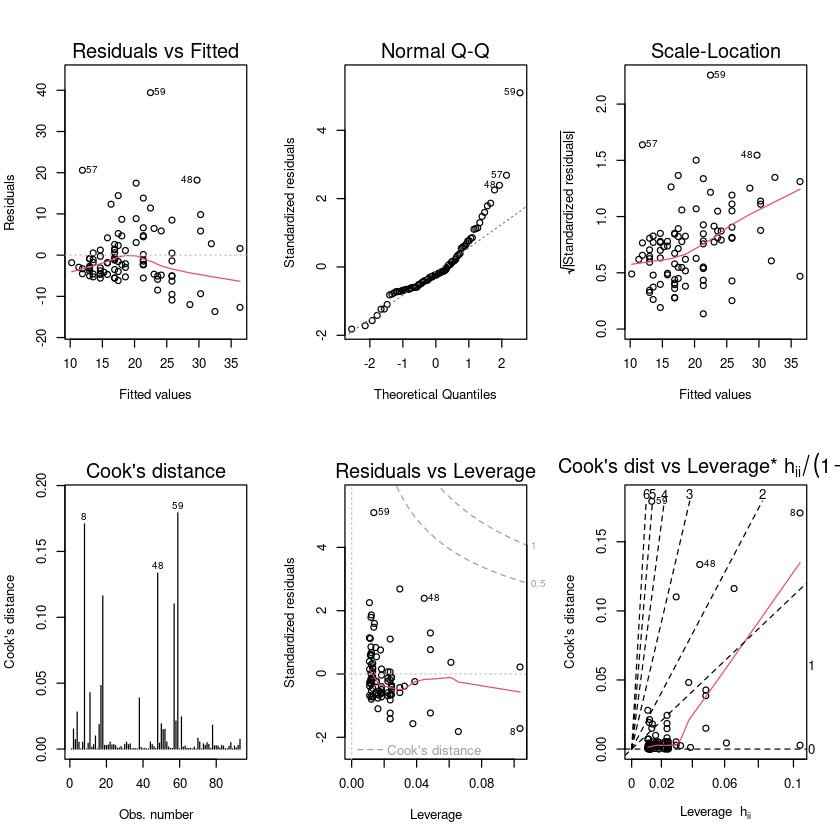

In [6]:
# 2X3 형태로 그래프를 배치하기 위한 화면 조정
par(mfrow=c(2,3))

# 그래프 생성
plot(Cars93_lm, which=(1:6))